In [7]:
!pip install tensorflow_decision_forests -q
!pip install wurlitzer -q

In [8]:
# standard
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
import math
import matplotlib.pyplot as plt

# tensorflow
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import tf_keras

# sklearn
from sklearn.preprocessing import *

# settings
os.environ['TF_USE_LEGACY_KERAS'] = '1'   # keep using Keras2
warnings.simplefilter('ignore')

In [9]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

In [12]:
# Paths to your dataset (adjust these if running locally)
train_file = 'train_drop_records.csv'
test_file = 'test_drop_records.csv'

# read data files
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# drop NULLs
train.dropna(inplace=True)
test.dropna(inplace=True)

# reset index
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

# view
print(f"Train Size: {train.shape}\nTest Size: {test.shape}\n\n")
train.head()

Train Size: (30072, 11)
Test Size: (7516, 11)




,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,1,0,0,0
2,1,0,1,1,0,1,0,0,0,1,1
3,1,1,0,0,0,1,1,1,0,0,0
4,0,0,0,1,1,1,1,1,0,1,0


In [13]:
# target column
target = 'Addiction_Class'

# target classes
target_classes = train[target].unique().tolist()
print(f"Target Classes: {target_classes}\n")



# label encode the column-data
le = LabelEncoder()
for tr,te in zip(train.columns,test.columns):
    train[tr] = le.fit_transform(train[tr])
    test[te] = le.fit_transform(test[te])

# view
train.head()

Target Classes: [0, 1]



,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,1,0,0,0
2,1,0,1,1,0,1,0,0,0,1,1
3,1,1,0,0,0,1,1,1,0,0,0
4,0,0,0,1,1,1,1,1,0,1,0


In [14]:
# convert to tensorflow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label=target)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label=target)

In [15]:
# instantiate model
rf_model = tfdf.keras.RandomForestModel(verbose=0,)

# train model
rf_model.fit(train_ds)

# evaluate model
rf_model.compile(metrics=['accuracy'])
evaluation = rf_model.evaluate(test_ds, return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.3f}")

8/8 [==============================] - 1s 36ms/step - loss: 0.0000e+00 - accuracy: 0.7960
loss: 0.000
accuracy: 0.796


In [16]:
# plot model
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=4)

In [17]:
# summary
rf_model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (10):
	Academic_Performance_Decline
	Denial_and_Resistance_to_Treatment
	Experimentation
	Financial_Issues
	Legal_Consequences
	Physical_Mental_Health_Problems
	Relationship_Strain
	Risk_Taking_Behavior
	Social_Isolation
	Withdrawal_Symptoms

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "Physical_Mental_Health_Problems"  0.213756 ################
    2.                   "Social_Isolation"  0.189613 #######
    3.                 "Legal_Consequences"  0.189168 #######
    4.                "Relationship_Strain"  0.181041 ####
    5.       "Academic_Performance_Decline"  0.1797

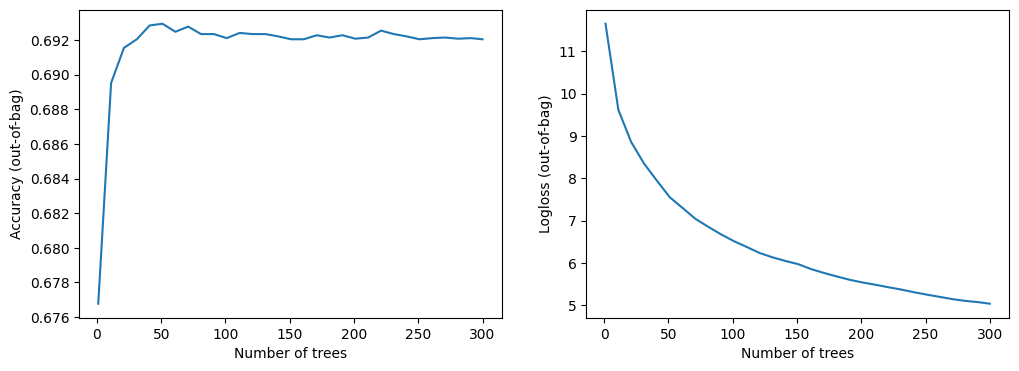

In [18]:
# training plot
logs = rf_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [19]:
# instantiate model
gb_model = tfdf.keras.GradientBoostedTreesModel(verbose=0,)

# train model
gb_model.fit(train_ds)

# evaluate model
gb_model.compile(metrics=['accuracy'])
evaluation = gb_model.evaluate(test_ds, return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.3f}")

8/8 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.7966
loss: 0.000
accuracy: 0.797


In [20]:
# plot model
tfdf.model_plotter.plot_model_in_colab(gb_model, tree_idx=0, max_depth=4)

In [21]:
# summary
gb_model.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (10):
	Academic_Performance_Decline
	Denial_and_Resistance_to_Treatment
	Experimentation
	Financial_Issues
	Legal_Consequences
	Physical_Mental_Health_Problems
	Relationship_Strain
	Risk_Taking_Behavior
	Social_Isolation
	Withdrawal_Symptoms

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "Physical_Mental_Health_Problems"  0.478261 ################
    2.                 "Legal_Consequences"  0.395506 ###########
    3.                "Relationship_Strain"  0.227979 ##
    4.                   "Social_Isolation"  0.222503 ##
    5.       "Academic_Performance_D

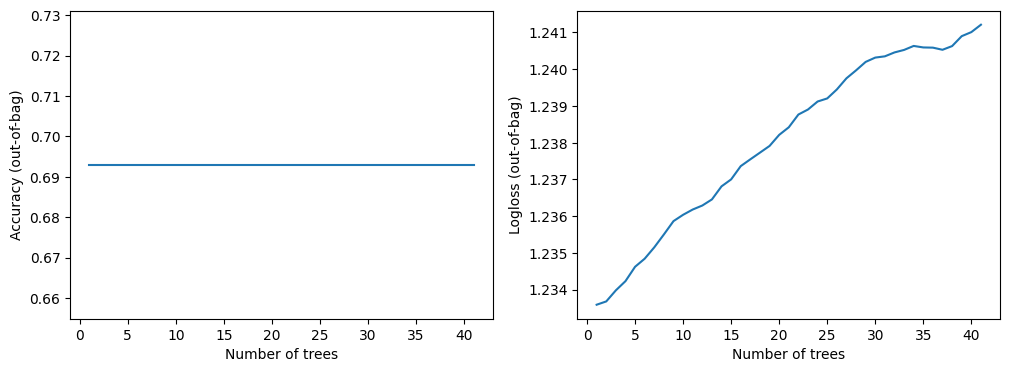

In [22]:
# training plot
logs = gb_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [23]:
# instantiate model
crt_model = tfdf.keras.CartModel(verbose=0,)

# train model
crt_model.fit(train_ds)

# evaluate model
crt_model.compile(metrics=['accuracy'])
evaluation = crt_model.evaluate(test_ds, return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.3f}")

8/8 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7956
loss: 0.000
accuracy: 0.796


In [24]:
# plot model
tfdf.model_plotter.plot_model_in_colab(crt_model, tree_idx=0, max_depth=4)

In [25]:
# summary
crt_model.summary()

Model: "cart_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (10):
	Academic_Performance_Decline
	Denial_and_Resistance_to_Treatment
	Experimentation
	Financial_Issues
	Legal_Consequences
	Physical_Mental_Health_Problems
	Relationship_Strain
	Risk_Taking_Behavior
	Social_Isolation
	Withdrawal_Symptoms

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Physical_Mental_Health_Problems"  1.000000 ################
    2.              "Legal_Consequences"  0.500000 ######
    3.                "Social_Isolation"  0.344828 ###
    4.             "Relationship_Strain"  0.270270 ##
    5.    "Academic_Performance_Decline"  0.227273 #
    6.            "Risk_Ta

In [26]:
# selecting features (based on feature importance)
feat_1 = tfdf.keras.FeatureUsage(name='Physical_Mental_Health_Problems')
feat_2 = tfdf.keras.FeatureUsage(name='Social_Isolation')
feat_3 = tfdf.keras.FeatureUsage(name='Risk_Taking_Behavior')
feat_4 = tfdf.keras.FeatureUsage(name='Withdrawal_Symptoms')

# creating a list
all_features = [feat_1,feat_2,feat_3,feat_4]

# creating Gradient Boosted Trees model with feature subset
model_sub = tfdf.keras.GradientBoostedTreesModel(features=all_features, exclude_non_specified_features=True)

# compile & train
model_sub.compile(metrics=["accuracy"])
model_sub.fit(train_ds)

# evaluation
evaluation = model_sub.evaluate(test_ds, return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.3f}")

Use /tmp/tmpli7ppcq8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.754609. Found 30072 examples.
Training model...
Model trained in 0:00:01.300853
Compiling model...
Model compiled.
8/8 [==============================] - 1s 54ms/step - loss: 0.0000e+00 - accuracy: 0.7966
loss: 0.000
accuracy: 0.797
